# Chapter 2 of "Applied Analytics Using SAS Enterprise Miner 14.2"

Please search pva97nk.sas7bdat file on the following url and download it.
Please place the downloaded file on the same folder where these Python codes are located.

# Data Source: https://www4.stat.ncsu.edu/~dickey/Analytics/Datamine/data/

The following codes replicate the processes of the "Applied Analytics Using SAS Enterprise Miner 14.2" with Python.
The pages (i.e., P7, P50, or P 101) refered in these Python codes are on the textbook above.

In [3]:
### Importing pva97nk.sas7bdat

import pandas as pd
import numpy as np
import matplotlib as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_sas('pva97nk.sas7bdat') # Note that we used pd.read_sas() here.
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0.0,b'00014974',NaN,2.0,4.0,1.0,3.0,17.0,13.50,9.25,17.00,21.0,66.0,8.0,17.0,26.0,3.0,8.0,13.0,b'A',0.0,b'00',NaN,b'F',b'U',0.0,0.0,0.0
1,0.0,b'00006294',NaN,1.0,8.0,0.0,3.0,20.0,20.00,15.88,NaN,26.0,92.0,14.0,35.0,79.0,5.0,5.0,24.0,b'A',0.0,b'23',67.0,b'F',b'U',186800.0,85.0,0.0
2,1.0,b'00046110',4.0,6.0,41.0,3.0,20.0,6.0,5.17,3.73,5.00,18.0,111.0,12.0,23.0,51.0,5.0,11.0,22.0,b'S',1.0,b'00',NaN,b'M',b'U',87600.0,36.0,38750.0
3,1.0,b'00185937',10.0,3.0,12.0,3.0,8.0,10.0,8.67,8.50,8.67,9.0,93.0,14.0,22.0,44.0,2.0,6.0,16.0,b'E',1.0,b'00',NaN,b'M',b'U',139200.0,27.0,38942.0
4,0.0,b'00029637',NaN,1.0,1.0,1.0,1.0,20.0,20.00,20.00,20.00,21.0,21.0,10.0,15.0,13.0,4.0,7.0,6.0,b'F',0.0,b'35',53.0,b'M',b'U',168100.0,37.0,71509.0


In [4]:
df.shape

(9686, 28)

In [5]:
### Setting the variable roles as in page (P) 2-27
# First, checking the dtype of each variable.
# Note that, according to P 2-27, only four variables except ID variables are nominal or binary varibles:
# StatusCat96NK, DemCluster, DemGender, and DemHomeOwner. Let's check the original data as it is.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null float64
ID                  9686 non-null object
TargetD             4843 non-null float64
GiftCnt36           9686 non-null float64
GiftCntAll          9686 non-null float64
GiftCntCard36       9686 non-null float64
GiftCntCardAll      9686 non-null float64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null float64
GiftTimeFirst       9686 non-null float64
PromCnt12           9686 non-null float64
PromCnt36           9686 non-null float64
PromCntAll          9686 non-null float64
PromCntCard12       9686 non-null float64
PromCntCard36       9686 non-null float64
PromCntCardAll      9686 non-null float64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null float64
DemCluster   

In [6]:
### From judging above, Python reveals ID, StatusCat96NK, DemCluster, DemGender, and DemHomeOwner as object(categorical variables).
# Let's check these five variables. 
# FYI, we don't have to check ID variable since ID does not play any role in our analysis.

df["StatusCat96NK"].value_counts(dropna=False)

b'A'    5826
b'S'    2365
b'F'     660
b'N'     574
b'E'     227
b'L'      34
Name: StatusCat96NK, dtype: int64

In [7]:
df["DemCluster"].value_counts(dropna=False)

b'40'    432
b'36'    401
b'24'    401
b'35'    384
b'27'    331
b'49'    323
b'12'    323
b'18'    321
b'13'    309
b'30'    262
b'14'    248
b'39'    242
b'00'    240
b'11'    236
b'45'    228
b'43'    227
b'51'    220
b'16'    201
b'41'    197
b'46'    196
b'28'    194
b'02'    191
b'44'    185
b'08'    182
b'17'    178
b'10'    175
b'20'    171
b'21'    165
b'53'    158
b'03'    153
b'42'    140
b'25'    135
b'34'    132
b'23'    131
b'22'    125
b'31'    125
b'01'    121
b'38'    118
b'15'    108
b'26'    100
b'37'     99
b'48'     96
b'05'     95
b'47'     86
b'07'     78
b'29'     73
b'32'     72
b'09'     70
b'50'     70
b'06'     53
b'33'     52
b'04'     51
b'19'     50
b'52'     32
Name: DemCluster, dtype: int64

In [8]:
df["DemGender"].value_counts(dropna=False)

b'F'    5223
b'M'    3925
b'U'     538
Name: DemGender, dtype: int64

In [9]:
df["DemHomeOwner"].value_counts(dropna=False)

b'H'    5377
b'U'    4309
Name: DemHomeOwner, dtype: int64

# From the above analysis, we saw that these four varibles are clean.
Which means, they don't have any noise such as white space, a point (.) value, or something.
Thus, we don't have to do the data-cleaning in these object variables. 
However, in the real world example data getting from the real company once you got a job there, there are usually  full of such non-formatted irregular content. 
Thus, In the real world, data-cleaning will take up your time, at least, two thirds of the whole analysis.
It may require you a week or multiple weeks.

# !!! very important codes in the future !!!
The following two block of codes are 1st method for checking irregular values (i.e., non-numbers, for example *, ., ....) 
Let's assume the variable name you want to check is variable1.

In [128]:
### FYI only. These codes are only examples.
# The 1st step to check irregular values (for example, *, ., white space, or etc.) other than numbers or alphabetical characters 

df["variable1"].isnull().sum()
df["variable1"].value_counts(dropna=False) 

KeyError: 'variable1'

In [129]:
### FYI only. These codes are only examples.
# The 2nd step to check irregular values (for example, *, ., white space, or etc.) other than numbers or alphabetical characters 

mask = pd.to_numeric(df['variable1'], errors='coerce').isna()
a = mask.sum() 
print (a)  

# By checking both results in the 1st and 2nd step, we can be sure of the existence or non-existence of irregular values.
###(For irregular values) To be, or not to be? That is the question!

KeyError: 'variable1'

# Removing TargetD and ID from our data set (P 2-27)

In [10]:
df1 = df.drop(['ID', 'TargetD'], axis=1)
df1.head()

# Now we can see the varialbe ID is erased in the new dataframe called df1.

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0.0,2.0,4.0,1.0,3.0,17.0,13.50,9.25,17.00,21.0,66.0,8.0,17.0,26.0,3.0,8.0,13.0,b'A',0.0,b'00',NaN,b'F',b'U',0.0,0.0,0.0
1,0.0,1.0,8.0,0.0,3.0,20.0,20.00,15.88,NaN,26.0,92.0,14.0,35.0,79.0,5.0,5.0,24.0,b'A',0.0,b'23',67.0,b'F',b'U',186800.0,85.0,0.0
2,1.0,6.0,41.0,3.0,20.0,6.0,5.17,3.73,5.00,18.0,111.0,12.0,23.0,51.0,5.0,11.0,22.0,b'S',1.0,b'00',NaN,b'M',b'U',87600.0,36.0,38750.0
3,1.0,3.0,12.0,3.0,8.0,10.0,8.67,8.50,8.67,9.0,93.0,14.0,22.0,44.0,2.0,6.0,16.0,b'E',1.0,b'00',NaN,b'M',b'U',139200.0,27.0,38942.0
4,0.0,1.0,1.0,1.0,1.0,20.0,20.00,20.00,20.00,21.0,21.0,10.0,15.0,13.0,4.0,7.0,6.0,b'F',0.0,b'35',53.0,b'M',b'U',168100.0,37.0,71509.0


# Exploring each varialbe (i.e., DemAge, TargetB, ...) (P 2-38: 2-49)
The histogram codes will be added in the future.
For the time being we just check the distribution via value_counts().

In [11]:
df1['DemAge'].describe()

count    7279.000000
mean       59.150845
std        16.516400
min        -0.000000
25%        47.000000
50%        60.000000
75%        73.000000
max        87.000000
Name: DemAge, dtype: float64

In [12]:
df1['DemAge'].isnull().sum()

2407

In [13]:
df1['DemAge'].isnull().mean()

0.24850299401197604

In [14]:
df1['DemAge'].plot(kind='hist')

In [15]:
df1['DemAge'].value_counts(dropna=False, normalize=True)

# We can see that there are 24.85% of NaN values.
# We will treat this NaN later in the part of imputation (for numeric values) or replacement (for categorical values).

 NaN     0.248503
 73.0    0.022300
 67.0    0.022197
 75.0    0.020958
 49.0    0.020752
 57.0    0.019306
 77.0    0.018893
 55.0    0.018790
 65.0    0.018687
 47.0    0.018480
 69.0    0.018377
 71.0    0.017861
 51.0    0.017241
 79.0    0.017035
 45.0    0.016932
 74.0    0.016725
 53.0    0.015693
 59.0    0.015486
 76.0    0.014351
 43.0    0.014247
 63.0    0.014247
 81.0    0.014041
 61.0    0.014041
 50.0    0.013525
 37.0    0.012905
 41.0    0.012802
 78.0    0.012699
 80.0    0.012699
 72.0    0.012595
 68.0    0.011976
 70.0    0.011976
 83.0    0.011873
 54.0    0.011563
 39.0    0.011460
 35.0    0.011357
 48.0    0.011150
 82.0    0.010944
 62.0    0.010737
 66.0    0.010634
 46.0    0.010221
 52.0    0.010221
 58.0    0.009808
 42.0    0.009292
 60.0    0.008982
 40.0    0.008363
 64.0    0.008156
 56.0    0.008053
 44.0    0.007743
 85.0    0.007743
 87.0    0.007640
 84.0    0.007227
 27.0    0.007124
 86.0    0.007020
 33.0    0.006711
 31.0    0.006091
 36.0    0

In [16]:
df1['TargetB'].value_counts(dropna=False, normalize=True)

1.0    0.5
0.0    0.5
Name: TargetB, dtype: float64

# Exploring DemAge and TargetB at the same time (P 2-51: 2-52)

In [18]:
c1 = df1['DemAge'] > 69
c1_filtered = df1[c1]
len(c1_filtered)

2369

In [19]:
c1_filtered['TargetB'].value_counts(dropna=False, normalize=True)

1.0    0.524694
0.0    0.475306
Name: TargetB, dtype: float64

# Replacement for interval variable DemMedIncome (p 2-63)

In [20]:
df2=df1.copy()
df2['DemMedIncome'].value_counts(dropna=False)
# We can see that the number of value 0.0 is 2357.

0.0         2357
43100.0       10
48772.0        8
72339.0        8
46250.0        8
67860.0        7
49277.0        7
40054.0        7
73833.0        7
57164.0        7
68819.0        6
87665.0        6
97480.0        6
61523.0        6
59357.0        6
49337.0        6
47580.0        6
65906.0        6
64579.0        6
34619.0        6
49601.0        6
38750.0        6
65288.0        6
46240.0        6
55991.0        6
56828.0        6
66949.0        6
54217.0        6
51377.0        6
36250.0        6
80929.0        6
47076.0        6
47308.0        6
44829.0        6
79882.0        6
50000.0        6
68331.0        5
36042.0        5
53750.0        5
29149.0        5
36756.0        5
48125.0        5
51112.0        5
70032.0        5
39013.0        5
45788.0        5
48911.0        5
55540.0        5
52363.0        5
39375.0        5
71424.0        5
47863.0        5
58656.0        5
40076.0        5
49134.0        5
44777.0        5
46571.0        5
43729.0        5
35000.0       

In [21]:
df2['DemMedIncome'].isnull().sum()

0

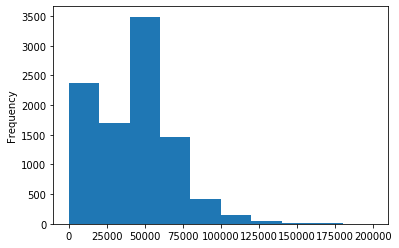

In [22]:
df2['DemMedIncome'].plot(kind="hist")

In [23]:
c2 = (df2['DemMedIncome'] < 1)
# c2 = (df2['DemMedIncome'] < 1) | (df2['DemMedIncome'] == 1)
c2_filtered = df2[c2]
len(c2_filtered)
# We can see that the number of value less than 1 is also 2317
# That means that all values of DemMedIncome less than 1 have the value of 0.0

2357

In [24]:
# replacing all values of DemMedIncome less than 1 into null.
# In other words, we should replace all DemMedIncome having zero value into null.

df2['DemMedIncome'].replace(0, np.nan, inplace=True)
# All zero values of DemMedIncome is made into empty space.

In [25]:
df2['DemMedIncome'].isnull().sum()

2357

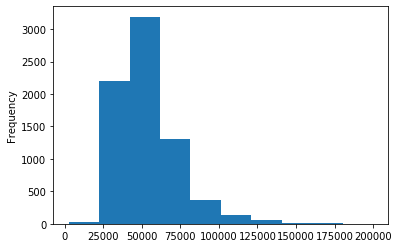

In [26]:
df2['DemMedIncome'].plot(kind="hist")

In [27]:
df2['DemMedIncome'].value_counts(dropna=False)

NaN         2357
43100.0       10
48772.0        8
72339.0        8
46250.0        8
67860.0        7
49277.0        7
40054.0        7
73833.0        7
57164.0        7
68819.0        6
87665.0        6
97480.0        6
61523.0        6
59357.0        6
49337.0        6
47580.0        6
65906.0        6
64579.0        6
34619.0        6
49601.0        6
38750.0        6
65288.0        6
46240.0        6
55991.0        6
56828.0        6
66949.0        6
54217.0        6
51377.0        6
36250.0        6
80929.0        6
47076.0        6
47308.0        6
44829.0        6
79882.0        6
50000.0        6
68331.0        5
36042.0        5
53750.0        5
29149.0        5
36756.0        5
48125.0        5
51112.0        5
70032.0        5
39013.0        5
45788.0        5
48911.0        5
55540.0        5
52363.0        5
39375.0        5
71424.0        5
47863.0        5
58656.0        5
40076.0        5
49134.0        5
44777.0        5
46571.0        5
43729.0        5
35000.0       

In [28]:
df2.to_csv('pva97nk_ch2_result.csv', index=False)